In [1]:
>>> import pandas as pd
>>> url = (
...     "https://archive.ics.uci.edu/ml/machine-learning-databases"
...     "/abalone/abalone.data"
... )
>>> abalone = pd.read_csv(url, header=None)

In [2]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [4]:
>>> abalone.columns = [
...     "Sex",
...     "Length",
...     "Diameter",
...     "Height",
...     "Whole weight",
...     "Shucked weight",
...     "Viscera weight",
...     "Shell weight",
...     "Rings",
... ]

In [5]:
abalone = abalone.drop("Sex", axis=1)

# Descriptive Statistics From the Abalone Dataset
When working on machine learning, you need to have an idea of the data you’re working with. Without going into too much depth, here’s a look at some exploratory statistics and graphs.

The target variable of this exercise is Rings, so you can start with that. A histogram will give you a quick and useful overview of the age ranges that you can expect:



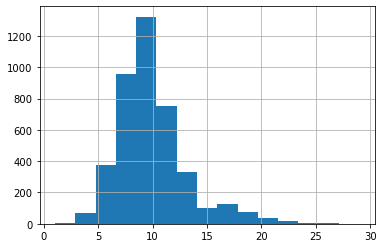

In [6]:
>>> import matplotlib.pyplot as plt
>>> abalone["Rings"].hist(bins=15)
>>> plt.show()

# The histogram shows that most abalones in the dataset have between five and fifteen rings, but that it’s possible to get up to twenty-five rings. The older abalones are underrepresented in this dataset. This seems intuitive, as age distributions are generally skewed like this due to natural processes.

A second relevant exploration is to find out which of the variables, if any, have a strong correlation with the age. A strong correlation between an independent variable and your goal variable would be a good sign, as this would confirm that physical measurements and age are related.

You can observe the complete correlation matrix in correlation_matrix. The most important correlations are the ones with the target variable Rings. You can get those correlations like this:



In [7]:
>>> correlation_matrix = abalone.corr()
>>> correlation_matrix["Rings"]


Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt


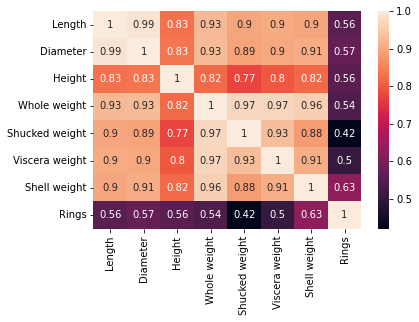

In [9]:
corrMatrix = abalone.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Define “Nearest” Using a Mathematical Definition of Distance
To find the data points that are closest to the point that you need to predict, you can use a mathematical definition of distance called Euclidean distance.

To get to this definition, you should first understand what is meant by the difference of two vectors. 

In this picture, you see two data points: blue at (2,2) and green at (4,4). To compute the distance between them, you can start by adding two vectors. Vector a goes from point (4,2) to point (4,4), and vector b goes from point (4,2) to point (2,2). Their heads are indicated by the colored points. Note that they are at a 90 degree angle.

The difference between these vectors is the vector c, which goes from the head of vector a to the head of vector b. The length of vector c represents the distance between your two data points.

The length of a vector is called the norm. The norm is a positive value that indicates the magnitude of the vector. You can compute the norm of a vector using the Euclidean formula:

# formula for euclidean distance 

d(a,b) = sqrt((a1-b1)^2 + (a2-b2)^2 + .....+(an-bn)^2)

In [11]:
#you can compute this in Python using linalg.norm() from NumPy. Here’s an example:

import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

# Dependendant and independent splitiing

In [12]:
>>> X = abalone.drop("Rings", axis=1)
>>> X = X.values
>>> y = abalone["Rings"]
>>> y = y.values

# Now you can apply a kNN with k = 3 on a new abalone that has the following physical measurements:

Variable	Value
Length	0.569552
Diameter	0.446407
Height	0.154437
Whole weight	1.016849
Shucked weight	0.439051
Viscera weight	0.222526
Shell weight	0.291208
You can create the NumPy array for this data point as follows:



In [13]:
new_data_point = np.array([
...     0.569552,
...     0.446407,
...     0.154437,
...     1.016849,
...     0.439051,
...     0.222526,
...     0.291208,
... ])

# The next step is to compute the distances between this new data point and each of the data points in the Abalone Dataset using the following code:

In [15]:
distances = np.linalg.norm(X - new_data_point, axis=1)
distances

array([0.59739395, 0.9518455 , 0.40573594, ..., 0.20397872, 0.14342627,
       1.10583307])

You now have a vector of distances, and you need to find out which are the three closest neighbors. To do this, you need to find the IDs of the minimum distances. You can use a method called .argsort() to sort the array from lowest to highest, and you can take the first k elements to obtain the indices of the k nearest neighbors:



In [20]:
>>> k = 3
>>> nearest_neighbor_ids = distances.argsort()[:k]
>>> nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

This tells you which three neighbors are closest to your new_data_point. In the next paragraph, you’ll see how to convert those neighbors in an estimation.

# Voting or Averaging of Multiple Neighbors
Having identified the indices of the three nearest neighbors of your abalone of unknown age, you now need to combine those neighbors into a prediction for your new data point.

As a first step, you need to find the ground truths for those three neighbors:

In [22]:
>>> nearest_neighbor_rings = y[nearest_neighbor_ids]
>>> nearest_neighbor_rings



array([ 9, 11, 10], dtype=int64)

Now that you have the values for those three neighbors, you’ll combine them into a prediction for your new data point. Combining the neighbors into a prediction works differently for regression and classification.

# Average for Regression
In regression problems, the target variable is numeric. You combine multiple neighbors into one prediction by taking the average of their values of the target variable. You can do this as follows:



In [24]:
prediction = nearest_neighbor_rings.mean()
prediction

10.0

# Mode for Classification
In classification problems, the target variable is categorical. As discussed before, you can’t take averages on categorical variables. For example, what would be the average of three predicted car brands? That would be impossible to say. You can’t apply an average on class predictions.

Instead, in the case of classification, you take the mode. The mode is the value that occurs most often. This means that you count the classes of all the neighbors, and you retain the most common class. The prediction is the value that occurs most often among the neighbors.
If there are multiple modes, there are multiple possible solutions. You could select a final winner randomly from the winners. You could also make the final decision based on the distances of the neighbors, in which case the mode of the closest neighbors would be retained.

You can compute the mode using the SciPy mode() function. As the abalone example is not a case of classification, the following code shows how you can compute the mode for a t

In [25]:
>>> import scipy.stats
>>> class_neighbors = np.array(["A", "B", "B", "C"])
>>> scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

# Fit kNN in Python Using scikit-learn

In [26]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=12345
... )

# Fitting a kNN Regression in scikit-learn to the Abalone Dataset

In [55]:
>>> from sklearn.neighbors import KNeighborsRegressor
>>> knn_model = KNeighborsRegressor(n_neighbors=3)

In [28]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# Model evaluation using regression metrics

In [32]:
>>> from sklearn.metrics import mean_squared_error
>>> from math import sqrt
>>> train_preds = knn_model.predict(X_train)
>>> mse = mean_squared_error(y_train, train_preds)
>>> rmse = sqrt(mse)
>>> rmse
print(mse)

print(rmse)

2.734743423459377
1.653705966446084


In [30]:
from sklearn.metrics import mean_absolute_error
>>> train_preds = knn_model.predict(X_train)
>>> mse = mean_absolute_error(y_train, train_preds)
mse

1.172403472014367

# on test data model evalaution

In [33]:
>>> test_preds = knn_model.predict(X_test)
>>> mse = mean_squared_error(y_test, test_preds)
>>> rmse = sqrt(mse)
>>> rmse

2.375417924000521

# Plotting the Fit of Your Model
A last thing to look at before starting to improve the model is the actual fit of your model. To understand what the model has learned, you can visualize how your predictions have been made using Matplotlib

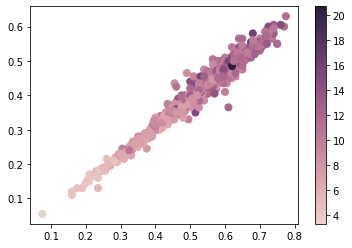

In [34]:
>>> import seaborn as sns
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
... )
>>> f.colorbar(points)
>>> plt.show()

# On test data

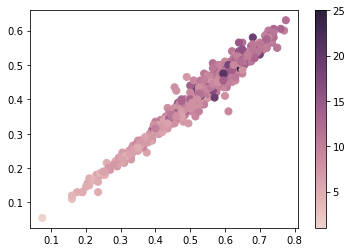

In [35]:
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
>>> )
>>> f.colorbar(points)
>>> plt.show()

# Improving kNN Performances in scikit-learn Using GridSearchCV
Until now, you’ve always worked with k=3 in the kNN algorithm, but the best value for k is something that you need to find empirically for each dataset.

When you use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:

If you use one neighbor only, the prediction can strongly change from one point to the other. When you think about your own neighbors, one may be quite different from the others. If you lived next to an outlier, your 1-NN prediction would be wrong.

If you have multiple data points, the impact of one extremely different neighbor will be much less.

If you use too many neighbors, the prediction of each point risks being very close. Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.

To find the best value for k, you’re going to use a tool called GridSearchCV. This is a tool that is often used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

GridSearchCV is available in scikit-learn, and it has the benefit of being used in almost the exact same way as the scikit-learn models:



In [37]:
>>> from sklearn.model_selection import GridSearchCV
>>> parameters = {"n_neighbors": range(1, 50)}
>>> gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
>>> gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})


Here, you use GridSearchCV to fit the model. In short, GridSearchCV repeatedly fits kNN regressors on a part of the data and tests the performances on the remaining part of the data. Doing this repeatedly will yield a reliable estimate of the predictive performance of each of the values for k. In this example, you test the values from 1 to 50.

In the end, it will retain the best performing value of k, which you can access with .best_params_:

In [38]:
>>> gridsearch.best_params_

{'n_neighbors': 25}

In [39]:
>>> train_preds_grid = gridsearch.predict(X_train)
>>> train_mse = mean_squared_error(y_train, train_preds_grid)
>>> train_rmse = sqrt(train_mse)
>>> test_preds_grid = gridsearch.predict(X_test)
>>> test_mse = mean_squared_error(y_test, test_preds_grid)
>>> test_rmse = sqrt(test_mse)
>>> train_rmse

2.0731180327543384

In [40]:
>>> test_rmse

2.1700197339962175

# Adding Weighted Average of Neighbors Based on Distance
Using GridSearchCV, you reduced the test RMSE from 2.37 to 2.17. In this section, you’ll see how to improve the performances even more.

Below, you’ll test whether the performance of your model will be any better when predicting using a weighted average instead of a regular average. This means that neighbors that are further away will less strongly influence the prediction.

You can do this by setting the weights hyperparameter to the value of "distance". However, setting this weighted average could have an impact on the optimal value of k. Therefore, you’ll again use GridSearchCV to tell you which type of averaging you should use:



In [41]:
>>> parameters = {
...     "n_neighbors": range(1, 50),
...     "weights": ["uniform", "distance"],
... }
>>> gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
>>> gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [42]:
>>> gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [43]:
>>> test_preds_grid = gridsearch.predict(X_test)
>>> test_mse = mean_squared_error(y_test, test_preds_grid)
>>> test_rmse = sqrt(test_mse)
>>> test_rmse

2.1634265584947485

 Here, you test whether it makes sense to use a different weighing using your GridSearchCV. Applying a weighted average rather than a regular average has reduced the prediction error from 2.17 to 2.1634. Although this isn’t a huge improvement, it’s still better, which makes it worth it.



# Further Improving on kNN in scikit-learn With Bagging
As a third step for kNN tuning, you can use bagging. Bagging is an ensemble method, or a method that takes a relatively straightforward machine learning model and fits a large number of those models with slight variations in each fit. Bagging often uses decision trees, but kNN works perfectly as well.

Ensemble methods are often more performant than single models. One model can be wrong from time to time, but the average of a hundred models should be wrong less often. The errors of different individual models are likely to average each other out, and the resulting prediction will be less variable.

You can use scikit-learn to apply bagging to your kNN regression using the following steps. First, create the KNeighborsRegressor with the best choices for k and weights that you got from GridSearchCV:

In [44]:
>>> best_k = gridsearch.best_params_["n_neighbors"]
>>> best_weights = gridsearch.best_params_["weights"]
>>> bagged_knn = KNeighborsRegressor(
...     n_neighbors=best_k, weights=best_weights
... )

In [45]:
>>> from sklearn.ensemble import BaggingRegressor
>>> bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

# Classification

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
>>> X = abalone.drop("Rings", axis=1)
>>> X = X.values
>>> y = abalone["Rings"]
>>> y = y.values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 0)
# Splitting the data into training and testing data
 

In [59]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]


In [60]:
for keys, values in scores.items():
    print(keys, ':', values)


2 : [0.5980157372562436, 0.22169059011164274]
3 : [0.5155661991105029, 0.20813397129186603]
4 : [0.46972288744440643, 0.20972886762360446]
5 : [0.4447485460143688, 0.22169059011164274]
6 : [0.42422169004447485, 0.22807017543859648]
7 : [0.41806363325350665, 0.22488038277511962]
8 : [0.403352719808416, 0.22807017543859648]
9 : [0.3903523776941498, 0.23843700159489634]
10 : [0.38453643516934655, 0.24162679425837322]
11 : [0.37290455011974, 0.24242424242424243]
12 : [0.3698255217242559, 0.2535885167464115]
13 : [0.3633253506671228, 0.259170653907496]
14 : [0.3602463222716387, 0.25757575757575757]
15 : [0.35340403694834077, 0.2551834130781499]
16 : [0.3441669517618885, 0.25598086124401914]
17 : [0.34108792336640437, 0.2607655502392344]
18 : [0.3345877523092713, 0.2607655502392344]
19 : [0.3400615805679097, 0.2567783094098884]
20 : [0.33835100923708517, 0.2583732057416268]


E:\ANAXONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


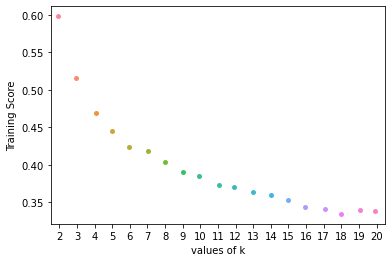

In [61]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')

plt.show()
# function to show plot


E:\ANAXONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


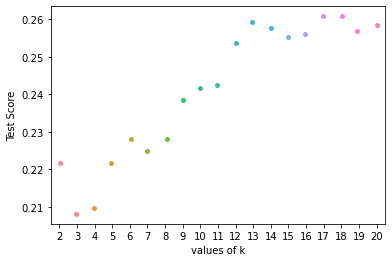

In [62]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()


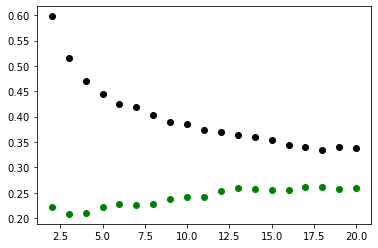

In [63]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots


In [64]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [66]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier()

In [67]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.22169059011164274

In [69]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [70]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  7,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11, 14, 13,  4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3, 10, 26, 25,  9,  2,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  6, 39, 38, 38,  7,  3,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4, 14, 29, 50, 46, 14,  5,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  4, 21, 45, 52, 40, 15,  2,  1,  0,  2,  2,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  4,  7, 22, 44, 56, 26,  6,  2,  1,  1,  1,  1,
         0,  0,  0,  0, 

In [71]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,All
True,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,15
5,11,14,13,4,0,1,0,0,0,0,0,0,0,0,0,0,43
6,3,10,26,25,9,2,0,0,1,1,0,0,0,0,0,0,77
7,1,6,39,38,38,7,3,0,0,0,0,0,0,0,0,0,132
8,0,4,14,29,50,46,14,5,1,1,0,0,0,0,0,0,164
9,0,1,4,21,45,52,40,15,2,1,0,2,2,1,0,0,186
10,1,0,4,7,22,44,56,26,6,2,1,1,1,1,0,0,172


In [72]:
#import classification_report
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.20      0.40      0.27        15
           5       0.33      0.33      0.33        43
           6       0.24      0.34      0.28        77
           7       0.27      0.29      0.28       132
           8       0.23      0.30      0.26       164
           9       0.21      0.28      0.24       186
          10       0.26      0.33      0.29       172
          11       0.20      0.19      0.19       147
          12       0.06      0.02      0.03       109
          13       0.07      0.03      0.04        62
          14       0.25      0.08      0.12        39
          15       0.00      0.00      0.00        26
          16       0.09      0.05      0.07        19
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00         8
          19       0.00    

E:\ANAXONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ANAXONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ANAXONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#. Parallel Coordinates
Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

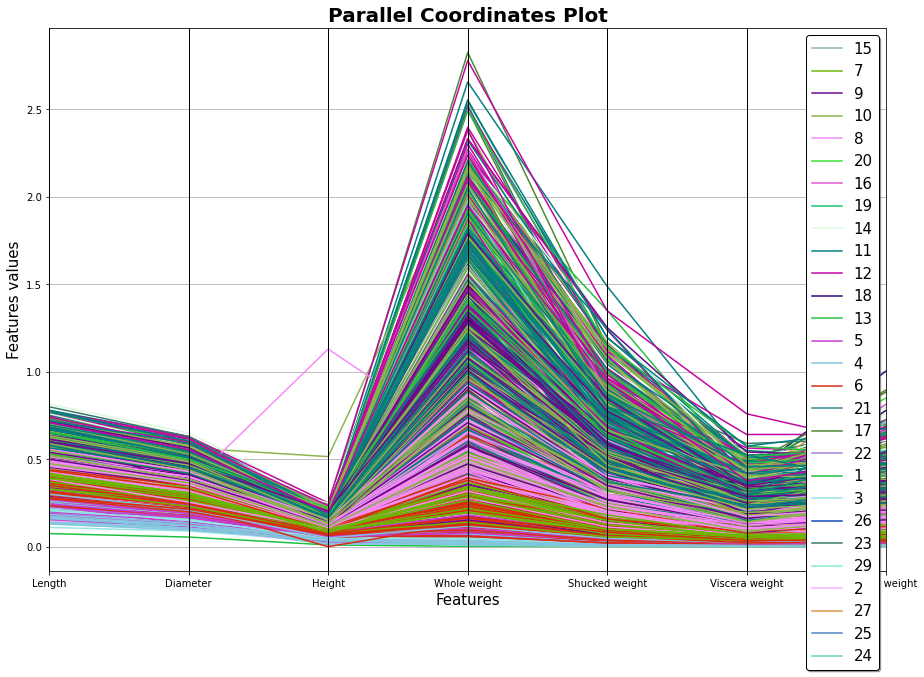

In [89]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(abalone, "Rings")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

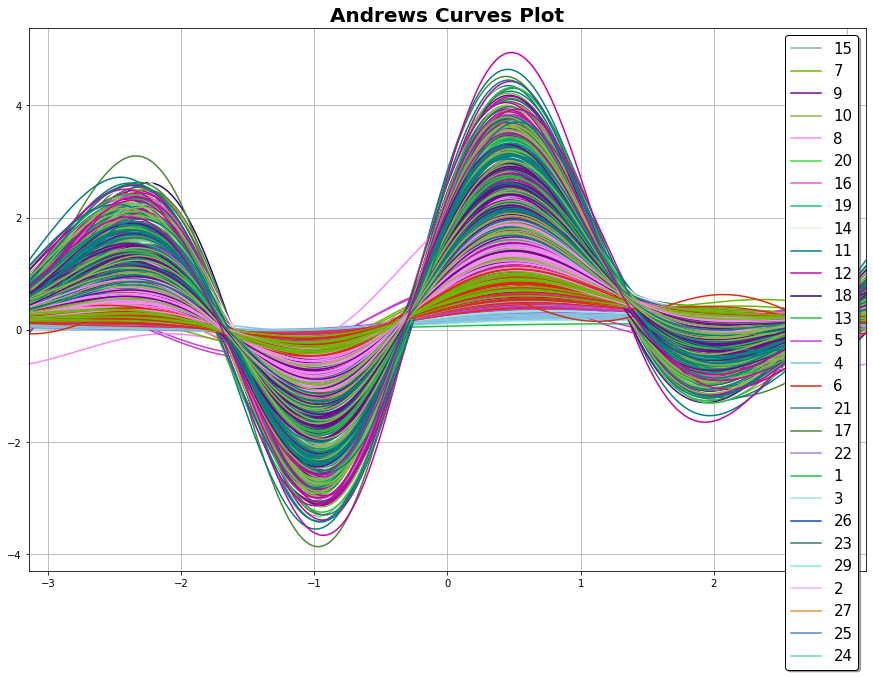

In [90]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(abalone, "Rings")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()